# EXERCISE 1

In [44]:
#creating the three vectors
name <- c("Winnipeg","Winnipegosis","Manitoba","SouthernIndian","Cedar","Island","Gods","Cross","Playgreen")
elevation <- c(217,254,248,254,253,227,178,207,217)
area <- c(24387,5374,4624,2247,1353,1223,1151,755,657)

#creating and visualizing the table
table <- cbind.data.frame(cbind.data.frame(name,elevation),area)
table

name,elevation,area
Winnipeg,217,24387
Winnipegosis,254,5374
Manitoba,248,4624
SouthernIndian,254,2247
Cedar,253,1353
Island,227,1223
Gods,178,1151
Cross,207,755
Playgreen,217,657


### POINT 1

In [119]:
#creating a mask that selects the highest lake(s)
hmask <- sapply(1:length(elevation), function(x) elevation[x]==max(elevation))
numh <- sum(hmask) #number of maxima

#creating a mask that selects the lowest lake(s) 
lmask <- sapply(1:length(table[,1]), function(x) elevation[x]==min(elevation))
numl <- sum(lmask) #number of minima
                
#sorted dataframe by height                
sorted_table_height <- table[order(table$elevation),]
       
#highest lakes are at the end, lowest at the beginning, so one can use tail and head functions                
highest_lakes <- tail(sorted_table_height, numh)
lowest_lakes <- head(sorted_table_height, numl)

print("The highest lakes are:")
highest_lakes

                
print("The lowest lakes are:")
lowest_lakes

[1] "The highest lakes are:"


,name,elevation,area
2,Winnipegosis,254,5374
4,SouthernIndian,254,2247


[1] "The lowest lakes are:"


,name,elevation,area
7,Gods,178,1151


### POINT 2

In [69]:
#the first (n_large) largest lakes will be displayed
n_large <- 2
#displaying the ordered data frame
sorted_table <- table[order(table[,3]),]
sorted_table
#displaying just the largest lakes
print('The largest lakes are:')
largest_lakes <- sorted_table[(length(sorted_table$name)-n_large+1):length(sorted_table$name),]
largest_lakes

,name,elevation,area
9,Playgreen,217,657
8,Cross,207,755
7,Gods,178,1151
6,Island,227,1223
5,Cedar,253,1353
4,SouthernIndian,254,2247
3,Manitoba,248,4624
2,Winnipegosis,254,5374
1,Winnipeg,217,24387


[1] "The largest lakes are:"


,name,elevation,area
2,Winnipegosis,254,5374
1,Winnipeg,217,24387


### POINT 3

In [123]:
water_area <- sum(table$area)
print("The total area occupied by water is: ")
water_area

[1] "The total area occupied by water is: "


[1] 41771

# EXERCISE 2

### POINT 1: Installing the DAAG package

In [125]:
#installing the DAAG package
#install.packages("DAAG", repos='http://cran.us.r-project.org')

also installing the dependencies 'RColorBrewer', 'lattice', 'latticeExtra'



package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'lattice' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'DAAG' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Perin\AppData\Local\Temp\RtmpslBV4L\downloaded_packages


### POINT 2: Loading the package

In [1]:
library("DAAG")

Warning message:
"package 'DAAG' was built under R version 3.5.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.3"

### POINT 3: Checking the attributes of the ais dataset

In [2]:
#displaying the ais dataset
ais
#checking the attributes
attributes(ais)

rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,53.77,174.0,63.7,f,B_Ball
4.31,5.3,39.6,12.8,73,21.69,87.2,19.99,60.17,186.2,75.2,f,B_Ball
4.42,5.7,39.9,13.2,44,20.62,97.9,22.43,48.33,173.8,62.3,f,B_Ball
4.30,8.9,41.1,13.5,41,22.64,75.1,17.95,54.57,171.4,66.5,f,B_Ball
4.51,4.4,41.6,12.7,44,19.44,65.1,15.07,53.42,179.9,62.9,f,B_Ball


$names
 [1] "rcc"    "wcc"    "hc"     "hg"     "ferr"   "bmi"    "ssf"    "pcBfat"
 [9] "lbm"    "ht"     "wt"     "sex"    "sport" 

$class
[1] "data.frame"

$row.names
  [1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159" "160" "161" "162" "163" "164" "165" "166" "167" "168"
[169] "169" "170" "171" "172" "173" "174" "175" "176" "177" "178" "179" "180"
[181] "181" "182" "183" "184" "185" "186" "187" "188" "189" "190" "191" "192"
[193] "193" "194" "195" "196" "197" "198" "199" "200" "201" "202"

### POINT 4: Checking for NaNs

In [3]:
#checking if any column has any NaN value
any_column <- (sapply(1:length(ais), function(x) any(is.na(ais[,x]))))

any_empty <- any(any_column)

print("There is at least one NaN in the dataset: ")
                      any_empty

[1] "There is at least one NaN in the dataset: "


[1] FALSE

### POINT 5: Males and females for each sport

In [39]:
distr <- table(ais$sport, ais$sex)
distr

         
           f  m
  B_Ball  13 12
  Field    7 12
  Gym      4  0
  Netball 23  0
  Row     22 15
  Swim     9 13
  T_400m  11 18
  T_Sprnt  4 11
  Tennis   7  4
  W_Polo   0 17

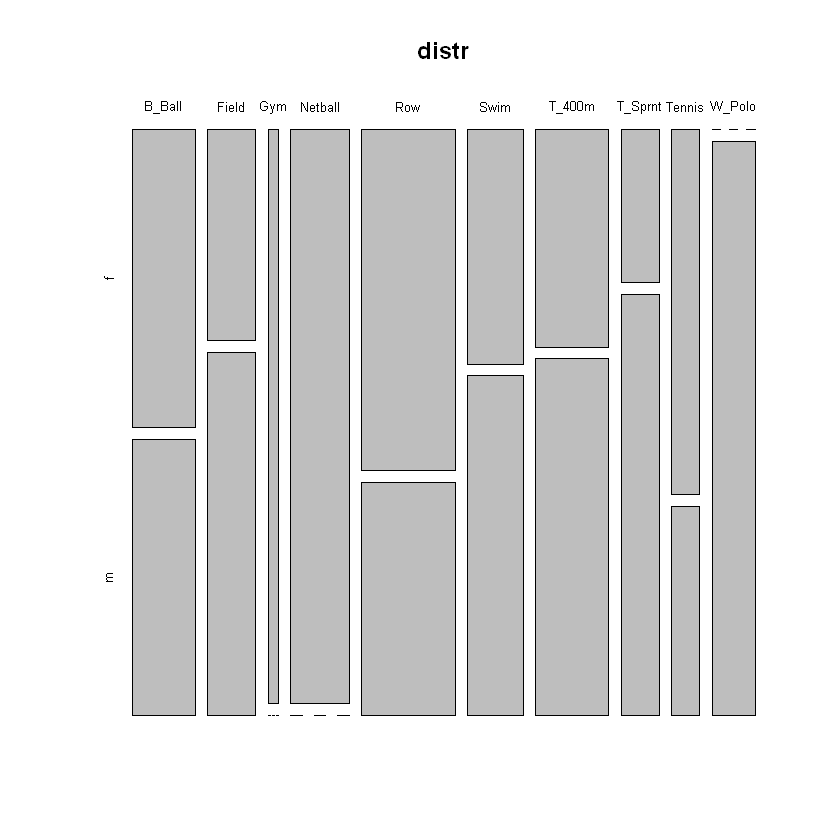

In [40]:
mosaicplot(distr)

# EXERCISE 3

In [41]:
#importing the dataset
X <- read.csv2('rilesemei_30062018_0_eng.csv', header = TRUE, sep=";", dec=".", stringsAsFactors=FALSE)

In [42]:
#checking if any has been lost by looking at its legth
X
length(X$Zone)

Zone,Region,Province,Town,Name,Popolation,TotalSections,DICUIOSP,Males,Females,Total,Males18,Females18,Total18,MalesAbroad,FemalesAbroad,TotalsAbroad
1,1,2,10,ACQUI TERME,20054,24,1,7710,8965,16675,34,30,64,408,424,832
1,1,2,20,ALBERA LIGURE,329,1,0,177,160,337,0,0,0,39,36,75
1,1,2,30,ALESSANDRIA,89411,93,1,35635,39458,75093,169,184,353,2719,2626,5345
1,1,2,40,ALFIANO NATTA,754,1,0,311,342,653,0,0,0,27,35,62
1,1,2,50,ALICE BEL COLLE,774,1,0,346,333,679,5,0,5,33,50,83
1,1,2,62,ALLUVIONI PIOVERA,1791,2,0,869,943,1812,4,6,10,176,208,384
1,1,2,70,ALTAVILLA MONFERRATO,497,2,0,227,213,440,1,1,2,32,34,66
1,1,2,80,ALZANO SCRIVIA,380,1,0,157,142,299,0,1,1,4,2,6
1,1,2,90,ARQUATA SCRIVIA,6068,8,0,2612,2744,5356,17,8,25,196,190,386
1,1,2,100,AVOLASCA,306,1,0,124,116,240,0,2,2,5,5,10


[1] 7954

In [45]:
tot_males <- sum(X$Males)+sum(X$MalesAbroad)
tot_females <- sum(X$Females)+sum(X$FemalesAbroad)

cat('The number of voting males (in Italy and abroad) is: ')
tot_males
cat('The number of voting females (in Italy and abroad) is: ')
tot_females
cat('The number of males who will become voters in the following 6 months is: ')
sum(X$Males18)
cat('The number of females who will become voters in the following 6 months is: ')
sum(X$Females18)

The number of voting males (in Italy and abroad) is: 

[1] 24921222

The number of voting females (in Italy and abroad) is: 

[1] 26481741

The number of males who will become voters in the following 6 months is: 

[1] 157332

The number of females who will become voters in the following 6 months is: 

[1] 148408

Therefore, there will be a

[1] 0.5947906

% increase in the voting population.